In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/movies.csv.zip')

In [ ]:
data['genres'] = data['genres'].replace("(no genres listed)", "Unknown")

data['Genre List'] = data['genres'].str.split('|')

unique_genres = set(genre for genres in data['Genre List'] for genre in genres)
for genre in unique_genres:
    data[genre] = data['Genre List'].apply(lambda x: int(genre in x))

data = data.drop(columns=['Genre List'])





In [ ]:

X = data.drop(columns=['title','genres'])
X.head()

,movieId,Film-Noir,Musical,Mystery,Unknown,Sci-Fi,Horror,Drama,War,Romance,...,Crime,Adventure,Western,Fantasy,Comedy,Thriller,Documentary,Animation,Children,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2
3,4,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,3
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=10, metric='euclidean')
cluster_labels = dbscan.fit_predict(X_scaled)

data['cluster'] = cluster_labels
print(data.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Film-Noir  Musical  Mystery  \
0  Adventure|Animation|Children|Comedy|Fantasy          0        0        0   
1                   Adventure|Children|Fantasy          0        0        0   
2                               Comedy|Romance          0        0        0   
3                         Comedy|Drama|Romance          0        0        0   
4                                       Comedy          0        0        0   

   Unknown  Sci-Fi  Horror  Drama  ...  Crime  Adventure  Western  Fantasy  \
0        0       0       0      0  ...      0          1        0        1   
1        0       0       0      0  ...      0          1        0   

In [ ]:
def recommend_movies(movie_title, data, top_n=5):
    if movie_title not in data['title'].values:
        return f"Error: Movie '{movie_title}' not found in the dataset."

    movie_cluster = data[data['title'] == movie_title]['cluster'].values[0]

    if movie_cluster == -1:
        return f"No recommendations: '{movie_title}' is in the noise cluster."

    recommendations = data[data['cluster'] == movie_cluster]

    recommendations = recommendations[recommendations['title'] != movie_title]

    if recommendations.empty:
        return f"No recommendations: No other movies found in the same cluster as '{movie_title}'."

    return recommendations[['title']].head(top_n)

movie_title = "Sense and Sensibility (1995)"
recommendations = recommend_movies(movie_title, data)
print(recommendations)



                             title
2          Grumpier Old Men (1995)
3         Waiting to Exhale (1995)
6                   Sabrina (1995)
10  American President, The (1995)
24        Leaving Las Vegas (1995)


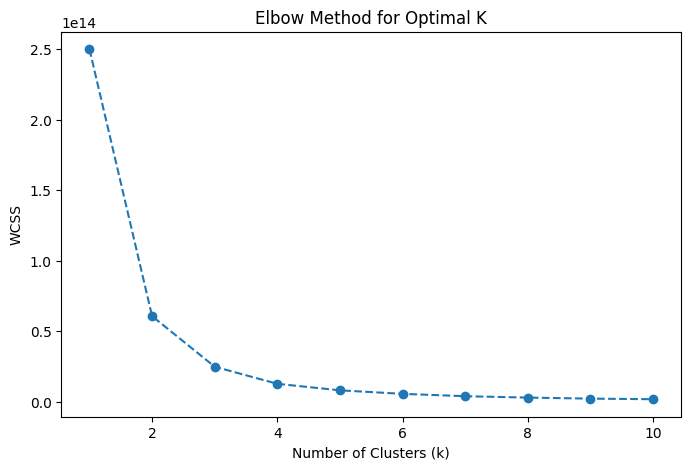

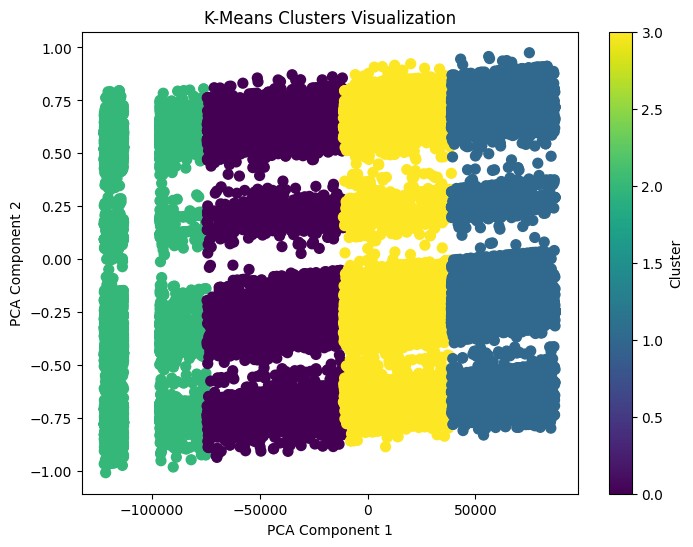

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop unnecessary columns (e.g., 'title') for clustering

# Step 1: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 2: Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Step 3: Apply K-Means with the optimal k
optimal_k = 4  # Replace with the value of k based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Step 4: Use PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 5: Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Step 2: Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

ValueError: could not convert string to float: 'Toy Story (1995)'

In [ ]:
from sklearn.cluster import KMeans




kmeans = KMeans(n_clusters=i)
kmeans.fit(data)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.scatter(x1, x2 marker='o')


In [ ]:

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/movies.csv.zip'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the 'movieId' column
df = df.drop('movieId', axis=1)

# Preprocess the 'genres' column (convert to list and one-hot encode)
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Merge encoded genres back with the titles (optional)
df = pd.concat([df[['title']], genres_df], axis=1)



In [ ]:
df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
